####  练习题

In [6]:
#lasso_regression.py  

import mglearn  
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.datasets import make_blobs
  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Lasso  
  
# 生成数据集    
X, y = mglearn.datasets.load_extended_boston()  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)  

#intercept = Lasso(alpha=0.0007,max_iter=10000).fit(X_train, y_train).intercept_
#print("Lasso.intercept_:",intercept )  

## or
lasso00001 = Lasso(alpha=0.0007,max_iter=10000).fit(X_train, y_train)  
print("lasso.coef_:{}".format(lasso00001.coef_))  
print("No.of features used:{}".format(np.sum(lasso00001.coef_!=0)))  

print("Traing set score: {:.2f}".format(lasso00001.score(X_train,y_train)))  
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test))) 


lasso.coef_:[-0.00000000e+00 -0.00000000e+00 -2.33443902e+01  1.23449905e+01
  0.00000000e+00  4.87160461e+01  2.50426049e+01 -3.87602689e+01
  1.99288945e+01 -0.00000000e+00 -0.00000000e+00  3.36437912e+01
  2.21549704e+01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.11632247e+02 -1.31844228e+00  2.03981038e+01 -0.00000000e+00
 -0.00000000e+00 -2.57854193e+01 -0.00000000e+00 -0.00000000e+00
  7.46941435e-02  1.06059580e+00  1.95057487e+00 -8.17283641e-02
 -3.37102971e+00  0.00000000e+00  3.21699104e+00 -6.24886547e+00
 -7.10105559e+00 -0.00000000e+00  1.20110001e+01  0.00000000e+00
 -0.00000000e+00 -1.25400997e+01  3.10997686e+00  0.00000000e+00
  2.77783403e+01  1.40106513e+01  3.70988234e+00  5.07287060e+00
  1.58582812e+01  1.39716054e+01 -0.00000000e+00 -0.00000000e+00
 -6.61690091e+00  6.58468814e-01 -1.43345427e+01 -2.59156686e+01
  2.91195473e+00  1.68675719e+01 -4.87035570e+00 -0.00000000e+00
 -4.46838960e+00  5.42108568e+00 -1.17840289e+01  0.00000000e+00
 -5.35895885e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# 2. 监督学习算法

## 2.1 朴素贝叶斯分类器

一系列分类器, 与线性模型非常相似. 

#### 条件概率(棣莫弗)

​	设A,B 为任意两个事件，若P(A)>0,　则称在已知事件A发生的条件下事件B发生的概率为**条件概率**,记为$P(B|A)$. 它定义为
$$
P(B|A) = \frac{P(AB)}{P(A)},  \ \ \ \ \ (P(A) > 0).
$$

#### 条件概率的例子
先回顾条件概率这一概念.

条件概率是已知事件A发生时，事件B发生的概率:
$P(B|A) .$

例如，假设你有一个事件B----你迟到.　有一个事件A----你的闹钟在早上没有响.

从你以往的经验看，你迟到的概率,P(B),也许很小．
你的闹钟坏了的几率P(A)也很小.
然而, 如果你想得到闹钟坏了时你迟到的概率(条件概率)，它是不是还很小呢？

这可以写成
$$
P(B|A) = P(AB)/P(A).
$$
你能预计P(A)会很小. P(B)也会很小.　然而, P(B|A)则可能比它们都大得多，因为在你闹钟坏了时你很可能迟到.

 


#### 全概率公式(拉普拉斯)



​	如果
$A_1 \cup A_2 = \Omega, A_1A_2 =\varnothing,  \  \  \  \ (P(A_1)>0, P(A_2)>0), \nonumber$
则对任一事件B,有
$$
\begin{eqnarray}
B &=& A_1B \cup A_2 B, \\
P(B) &=&  P(A_1)P(B|A_1) +  P(A_2)P(B|A_2) 
\end{eqnarray}
$$



​	这里我们讨论全概率公式的最简单形式，可推广到
$$
\cup_{i=1}^nＡ_i =\Omega, i =1,...,n \nonumber
$$
情形.



#### 贝叶斯公式(贝叶斯)

​	如果
$$
\cup_{i=1}^n A_i = \Omega, A_iA_j = \varnothing (i\neq j), P(A_i) > 0
$$
则对任一事件B，只要
$P(B) > 0,$
就有
$$
P(A_j|B) = \frac{P(A_j)P(B|A_j)}{\sum_{i=1}^nP(A_i)P(B|A_i)},  \ \ \ \ \ (j = 1,2,,...,n).
$$
$P(AB)$是在样本空间为$\Omega$时，$A$与$B$同时发生的可能性．

$P(B|A_j)$表示$A_j$已经发生的情况下B发生的可能性．此时样本空间已经缩减.　

可见，贝叶斯公式中用到了全概率公式．
$A_j \nonumber$
通常称为先验事件,而

$B$常称为Evidence.


**贝叶斯**(Bayes,1702-1761),英国数学家．	

1746年-1749年中的某一年，贝叶斯写了一篇在数学界影响深远的论文<**论机会学说问题的求解**>.　他的关键思想是：试图使用我们看到的中奖和未中奖彩票来分析来源于整个彩票池的彩票的方法. 也就是说，他提出了一种归纳推理的理论．其中的一个公式后来称为"贝叶斯公式"(也称贝叶斯定理)说的是：已知结果E时,该公式可以对所有原因B计算其条件概率
$$
P(B_i|E) = \frac{P(B_i)P(E|B_i)}{P(E)}\ .
$$
这是最早的统计推断程序．后来，被统计学家发展称为了一种系统的统计推理方法----**贝叶斯方法**. 以致后来形成了数理统计中的贝叶斯学派. 如今在概率论和数理统计学中，以贝叶斯命名的有如下：贝叶斯公式，贝叶斯风险，贝叶斯决策函数，贝叶斯决策规则，贝叶斯方法，贝叶斯统计，贝叶斯估计量等等.
 
朴素贝叶斯分类器是另一种用于分类的机器学习方法.
贝叶斯分类器是一类机器学习方法(generative　models)中的一个典型方法. 

#### 贝叶斯分类器的分类
朴素贝叶斯主要有三类: GaussianNB, BernoulliNB, MultinomialNB.

GaussianNB: 可用于任意连续数据.

BernoulliNB: 用于Binary数据.

MultinomialNB: 用于整数型数据(计数), 如词频.

BernoulliNB, MultinomialNB 常用于文本分类.

#### 举例: BernoulliNB分类器

In [7]:
# binary features
X = np.array([[0,1,0,1],
              [0,0,0,1],
              [1,0,1,0],
              [1,0,1,1]])
# binary classes
y = np.array([0,1,0,1])
print(np.unique(y))

# 对每个类别里的非零元素计数
counts ={}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)  # 样本间相加 for label=0, [0+1, 1+0, 0+1, 1+0];  for label=1, [0+1, 0+0, 0+1, 1+1]
print("Feature counts:\n{}".format(counts))    

[0 1]
Feature counts:
{0: array([1, 1, 1, 1]), 1: array([1, 0, 1, 2])}


#### MultinomialNB
对每一个类别, 多项式NB考虑每个特征的平均值.

#### GaussianNB
对每一个类别, 高斯NB考虑每个特征的平均值以及标准差.

#### 预测
为了预测, 将新数据点与每一个分类的统计性质做比较,最接近的类别就作为预测结果.

#### 参数

BernoulliNB, MultinomialNB, 有一个参数alpha控制模型复杂程度. 算法增加alpha个对于任何特征都具有正值的虚数据点. alpha越大,数据越光滑, 因此模型的复杂程度降低. (一般,调节alpha对模型的性能影响不是很大)

GaussianNB: 一般用于维度非常高的数据(特征数目很大).

#### 特点: 

优点: 
    1. 训练的效率 比线性模型还要更高!
    2. 对高维稀疏数据非常好;
    3. 对参数的变化不敏感.

缺点: 在普遍性上,比线性模型(如LogisticRegression, LinearSVC)性能稍差.


为什么朴素贝叶斯这么高效? 

因为它们单独地处理每一个特征,从单个特征搜集简单的预分类.

## 2.2 核化支持向量机

核化支持向量机, 有时就简记为SVMs,是前面介绍的线性支持向量机的推广.  

它不是简单地由特征空间的超平面定义.

可以用作分类 (SVC),也可以做回归(SVR).


Text(0,0.5,'X1')

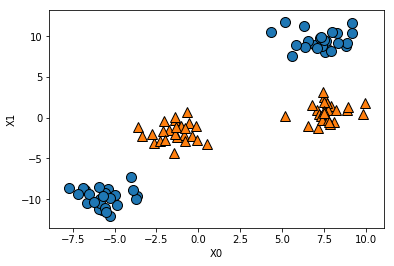

In [3]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("X0")
plt.ylabel("X1")

线性模型只能用直线来分类, 它对上图这样的数据集的分类无能为力. 如下:

Text(0,0.5,'$X_1$')

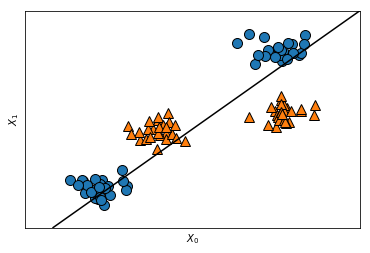

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

plt.xlabel("$X_0$")
plt.ylabel("$X_1$")

为了解决这样问题,一种可采取的办法是: 展开已有的特征,增加新的特征. 例如,原来的数据点是($X_0,X_1$), 现在, 我们把数据点拓展为($X_0, X_1, X_1^2$).

Text(0.5,0,'$X_1^2$')

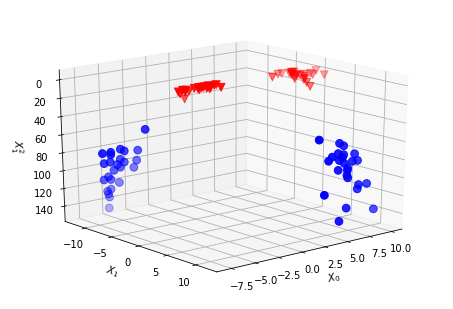

In [5]:
X_new = np.hstack([X, X[:,1:] ** 2] )

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev=-160, azim=-50)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2], c="b", cmap= mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c="r",marker="v", cmap= mglearn.cm2, s=60)
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
ax.set_zlabel("$X_1^2$")

在这样的新的数据表示中, 我们可以使用线性模型来做分类了!

Text(0.5,0,'$X_1^2$')

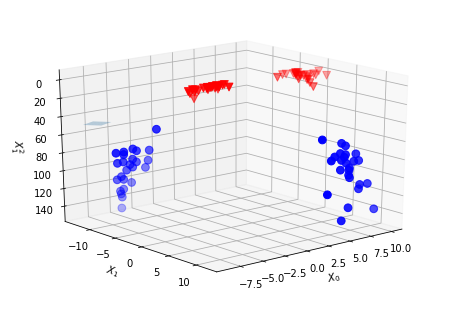

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 显示决策边界
figure = plt.figure()
ax = Axes3D(figure, elev=-160, azim=-50)

xx = np.linspace(X_new[:,0].min() - 1, X_new[:,0].min() + 1, 50)
yy = np.linspace(X_new[:,1].min() - 1, X_new[:,1].min() + 1, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ =  (coef[0] * XX + coef[1] * YY + intercept)/ (-coef[2])
mask = y == 0
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8,alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2], c="b", cmap= mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c="r",marker="v", cmap= mglearn.cm2, s=60)
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
ax.set_zlabel("$X_1^2$")

## 2.3 神经网络/ 深度学习

多层感知机(Multilayer perceptrons, MLP):
    可用于分类和回归.

对于只有$p$个特征的数据集,线性回归的预测值由下面式子给出:

$\hat y = w[0]*x[0]+ ...+ w[p]*x[p] + b$.

这可以看作是输入的带权重的求和. 

如果把输出再作为输入,传入下一层,.... 最后得到多次带权重的求和,一个输出. 一般还有一个非线性函数(一般选relu或称整流线型单元(rectified linear unit), 双曲正切函数,等)应用于该输出,从而得到预测值. 这就是多层感知机模型. 

Text(0.5,0,'y')

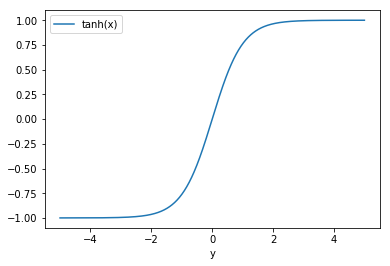

In [49]:
x = np.linspace(-5, 5, 1000)

plt.plot(x, np.tanh(x), label="tanh(x)")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")

Text(0,0.5,'relu(x), tanh(x)')

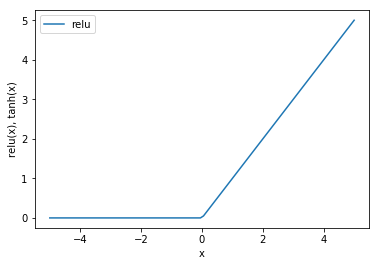

In [48]:
line = np.linspace(-5, 5, 100)
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0,0.5,'y')

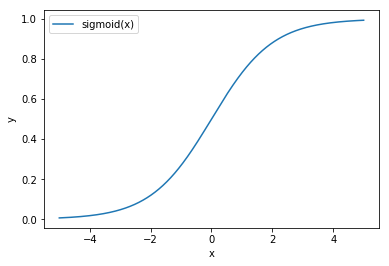

In [50]:
import math    
def sigmoid(x):
     return 1 / (1 + math.e ** -x) 
    
x = np.linspace(-5, 5, 1000)
plt.plot(x, sigmoid(x), label="sigmoid(x)")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")

<Figure size 432x288 with 0 Axes>

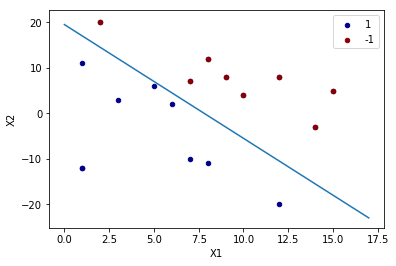

In [8]:
% run perceptron_clf.py input1.csv output1.csv

<Figure size 432x288 with 0 Axes>

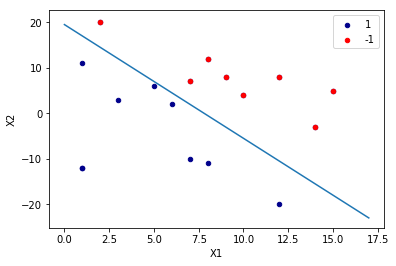

In [9]:
# 感知机分类器
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

def sigmoid(c):
    res = 1/(1 + np.exp(-c))
    if res > 0.5:
        return 1
    else:
        return -1

def perceptron():
    global df, cost,eta,x,w,lens,b,file_o
    count = 0
    for i in range(lens):
        x[0] = df['X1'][i]
        x[1] = df['X2'][i]
        y = df['y'][i]
        c = w*x + b
        #print(c)
        #For each instance the proceptron makes its predictions
        y1 = sigmoid(c)
        #print("predicted y1 and original y",y1,y)
        if y*y1<0:
            count +=1
            w = w + eta*x.T*y
            #print('w:',w)
            b = b + eta*y
            #print('b:',b)
            cost += -y*(w*x +b)
            #print('cost:',cost)
            #print(w[0,0],w[0,1],b)
    if count != 0:
        #Remember the comma
        file_o.write("{0:10.6f}, {1:10.6f}, {2:10.6f}\n".format(w[0,0],w[0,1],b))
        perceptron()
    else:
        file_o.write("{0:10.6f}, {1:10.6f}, {2:10.6f}\n".format(w[0,0],w[0,1],b))
        return

if __name__ == "__main__": 
    output_name ="output1.csv"
    df = pd.read_csv("input1.csv", names=['X1','X2','y'])

    b = 0
    w = [1, 1]
    x = [0, 0]
    lens = df.iloc[:,0].size #Get the number of rows of DataFrame
    cost = 20

    w = np.matrix(w)
    x = np.matrix(x).T
    eta = 0.01

    #Then create a new file : output1.csv
    file_o = open(output_name, 'w') #the cube file as output
    perceptron()
    plt.figure()
    
    # To seperate the date with label = -1
    df1 = df[df['y']==-1]
    
    ax = df.plot.scatter(x='X1', y='X2', color='DarkBlue', label='1');
    df1.plot.scatter(x='X1', y='X2', color='Red', label='-1', ax=ax);
    
    xx = np.linspace(0,17,100)
    yy = [-w[0,0]/w[0,1] * i - b/w[0,1] for i in xx]
    plt.plot(xx,yy)
    plt.show()

Text(0,0.5,'X1')

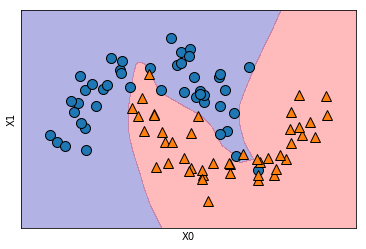

In [36]:
#训练神经网络, 求分类边界
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=120, noise=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# 利用L-BFGS算法优化
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("X0")
plt.ylabel("X1")

分析: 
    1. 神经网络得到的是非线性的边界, 但边界更光滑. 
    2. 对于小的数据集, 可以降低隐结点的数目.


Text(0,0.5,'X1')

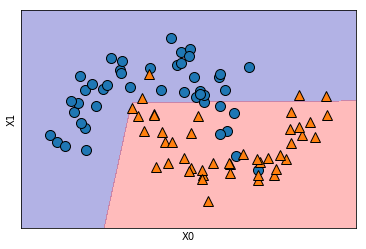

In [10]:
#训练神经网络
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=120, noise=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

mlp = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[4,4]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("X0")
plt.ylabel("X1")

Text(0,0.5,'X1')

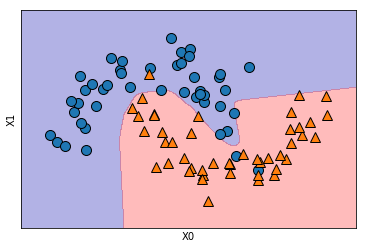

In [11]:

# 为了得到更光滑的边界,可设置activation="tanh"
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=120, noise=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

mlp = MLPClassifier(solver='lbfgs',activation="tanh", random_state=0, hidden_layer_sizes=[4,4]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel("X0")
plt.ylabel("X1")

神经网络的特征: 

    1. 在训练之前, 权重的值都是随机地设置的, 这样随机的设置会影响训练出的模型.所以,即使用的同样的参数,也可能得到非常不同的模型.对于小的网络,这一点尤其注意.
    2. 神经网络的优点: 利用大量数据的信息, 可以建立相当复杂的模型. 只有有足够的算力,时间和合适的参数调整,对于分类问题和回归问题来说,神经网络表现就会比其他机器算法更好.
    3. 缺点: 对于大的神经网络, 训练时间太长. 且常需要数据预处理.
    4. 和SVM相似, 神经网络常用来处理具有相似意义的特征. 而特征性质差别比较大的数据集,往往决策树方法更好.
    5. 调整神经网络的参数也是一门学问.

# 3. 非监督学习

数据集转换(transformations of datasets)和聚类 (clustering).

#### 数据集转换(transformations of datasets)
为数据创建新的表示, 便于人或机器算法更好地理解数据. 常用的方法: 降维. 降维的特点: 用更少的特征来表示数据.
其应用: 制作文档的摘要.

#### 聚类算法
将相似的数据分离到不同的分组中去. 如社交网站上的照片的自动分类算法, 同一个人的照片,自动分到一组. 这里没有标签,算法也不知道照片里的人具体是谁,但能找出相似性. 类似于网络分析那一讲中提到的经典问题--寻找社区.

#### 用途和挑战
非监督学习,可以用作监督学习的"前奏",对数据进行预先处理.然后再把其结果用来做监督学习.

## 3.1  一些处理方法

做非监督学习前一些处理方法, 主要有: 标度修正(rescaling data)(修改平均值, 标准差, 归一化,...), 数据转化(data transformations),

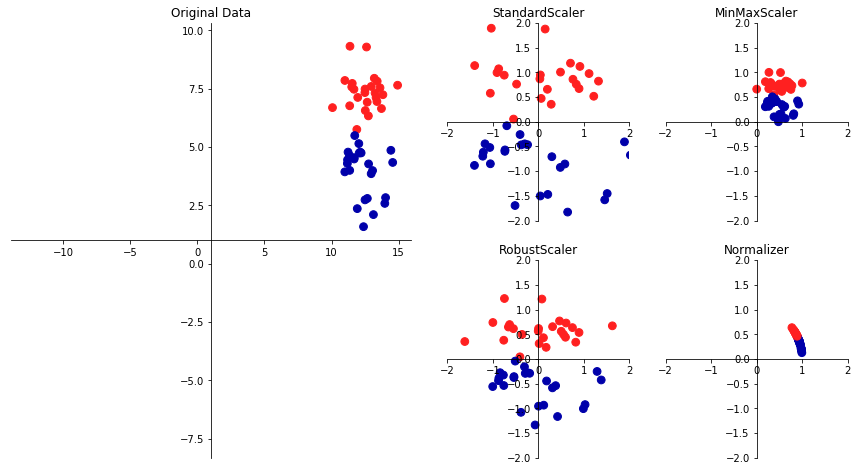

In [14]:
mglearn.plots.plot_scaling()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
MinMaxScaler(copy=True, feature_range=(0,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

注意: 对训练集和测试集要用同样的方式做数据预处理.

## 3.2  主成分分析(PCA)

主成分分析: 以某种方式旋转数据集,以使得旋转后的特征统计关联得以消除.

旋转数据集后,往往只选出新特征的一个子集. 选择的方式,根据其对于解释数据的重要性.

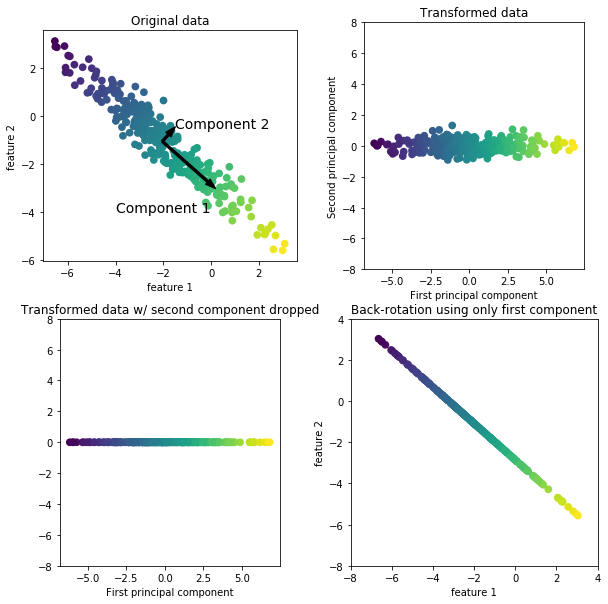

In [16]:
mglearn.plots.plot_pca_illustration()

分析:  

    图1,算法先找出最大方差的方向, 标记为"分量1"(component 1). 该方向包含了最多的信息. 在该方向上,特征相互之间的关联最大!
    接下来,算法找出包含最多信息的方向,同时与分量1正交的分量. (在2D情形,此方向只有一个; 但高维情形,可能有许多与分量1正交的方向.)
    分量的正方向并不重要. 这中方法找出的方向,称为主分量(主成分). 一般,主成分的个数与原始的特征之数目是一样的.

    图2做了旋转,主分量与x轴平行了!  且数据以(0,0)为中心了.
    旋转后,两个轴的数据不再有关联: 数据的关联矩阵除了对角元素不为0, 其他元素都为0.

    图3: 我们可以用PCA实现降维, 只用主成分去做训练. 我们或许可以只保留第一主成分. 这样,上图中的数据,由2维,降到1维了.

    图4, 旋转回去,并加上平均值. 只剩下主成分上的信息.噪声去掉了.

#### PCA应用举例: 

一个未知的人脸是否属于数据集中一个已知的人? 怎么做到?

对一张图片用PCA可实现特征提取. 比较两张照片的主成分的距离,而不是直接比较两张照片像素点的值构成的矢量的距离. 

## 3.3 多重学习: t-SNE
多重学习法,可以克服PCA的一些不足之处.最典型的一种多重学习算法是: t-SNE.

多重学习的主要目标: 更好地可视化.
是为了训练方便,将训练数据重新表示,而不对数据做转换. 也就是说,此算法不应用到测试集上. 

t-SNE的基本思想: 维数据找到一个二维表示,并且尽可能地保持数据点之间的距离不变, 然后,让原本靠得近的数据点更靠近,让原来的表示下离得远的点离得更远. t-SNE让"数据点之间是否是邻居"这样一种关系(信息)得到重视和保护.

注: T-distributed Stochastic Neighbor Embedding (t-SNE) 是一种用于可视化的机器学习算法, 由Laurens van der Maaten和 Geoffrey Hinton开发.



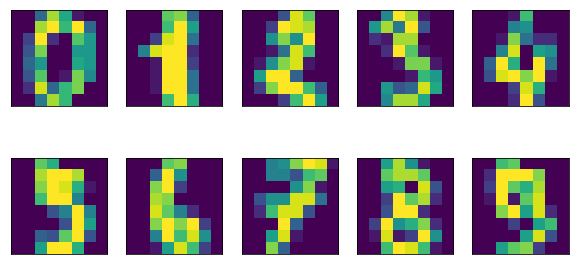

In [12]:
# 导入数据,为t-SNE准备
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [54]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# 快速写法 fit_transform, 因为TSNE 中没有转换方法
digits_tsne = tsne.fit_transform(digits.data)

Text(0,0.5,'2nd PC')

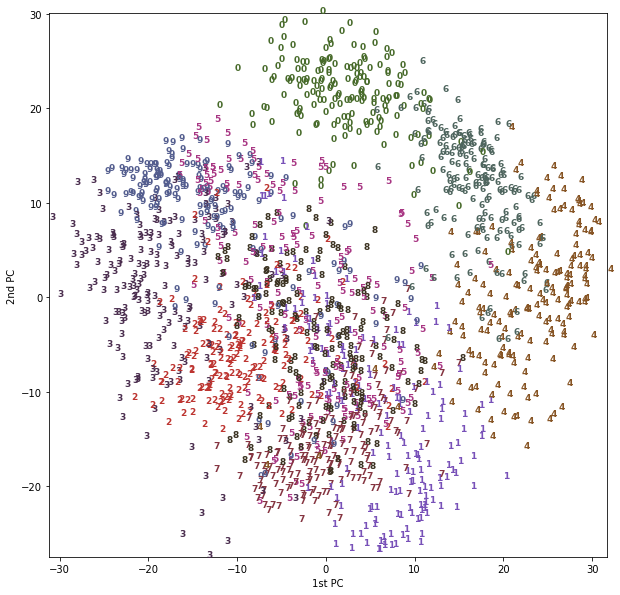

In [13]:
# 做为参照: 先建立 PCA模型
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# 将数字数据转换到前面两个主分量
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("1st PC")
plt.ylabel("2nd PC")

Text(0,0.5,'t-SNE X1')

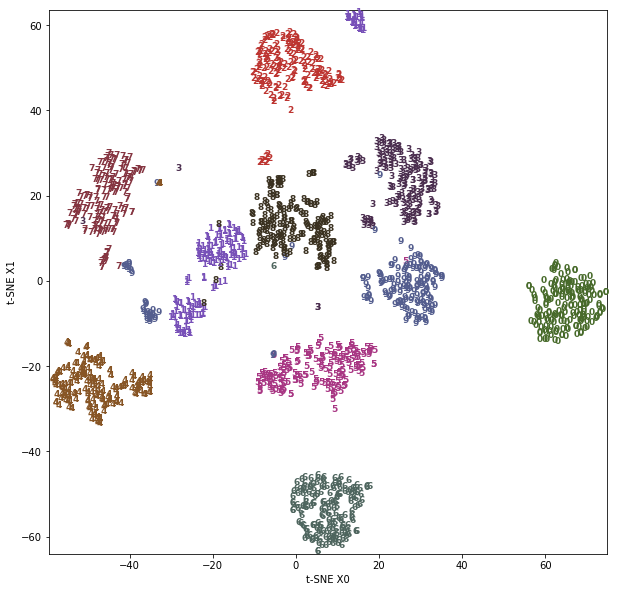

In [61]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE X0")
plt.ylabel("t-SNE X1")

## 3.4 聚类算法 (clustering)

### 3.4.1 K均值聚类
最简单和最常用的一种聚类算法. 试着找出聚类中心(cluster centers).

#### 聚类步骤:
第一步: 把每一个数据点分配给最近的聚类中心

第二部: 把数据点的新的平均值设置为新的聚类中心.

重复第一, 第二步骤,直到数据的聚类中心不再改变.




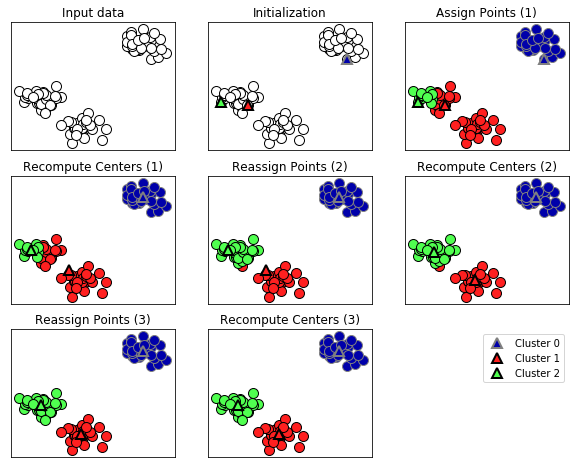

In [17]:
mglearn.plots.plot_kmeans_algorithm()

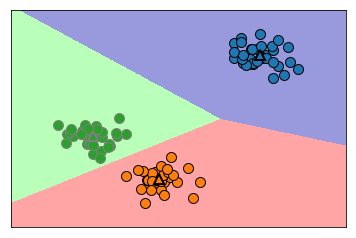

In [18]:
mglearn.plots.plot_kmeans_boundaries()

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成数据
X, y = make_blobs(random_state=0)

# 建立和拟合模型 : 我们设置为3个类别 (0,1,2)
kmeans = KMeans(n_clusters=4).fit(X)

In [18]:
print(kmeans.labels_)

[0 2 0 1 2 2 3 1 0 2 2 2 0 2 3 0 3 2 1 3 3 3 3 3 0 0 0 0 3 1 2 0 0 2 3 2 2
 0 0 1 3 0 0 1 2 2 0 0 1 3 2 0 2 0 1 3 0 0 2 0 0 3 3 1 3 0 2 3 0 2 1 0 1 0
 2 2 2 2 3 0 1 2 0 1 2 2 2 2 0 2 2 0 1 1 3 1 2 2 3 1]


In [19]:
#预测结果
kmeans.predict(X)

array([0, 2, 0, 1, 2, 2, 3, 1, 0, 2, 2, 2, 0, 2, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 1, 2, 0, 0, 2, 3, 2, 2, 0, 0, 1, 3, 0, 0, 1,
       2, 2, 0, 0, 1, 3, 2, 0, 2, 0, 1, 3, 0, 0, 2, 0, 0, 3, 3, 1, 3, 0,
       2, 3, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 3, 0, 1, 2, 0, 1, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 1, 3, 1, 2, 2, 3, 1])

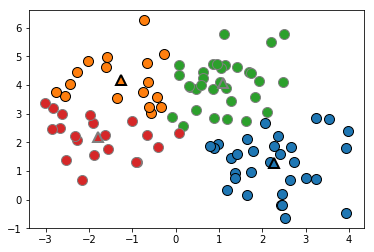

In [21]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2, 3],
    markers='^', markeredgewidth=2)

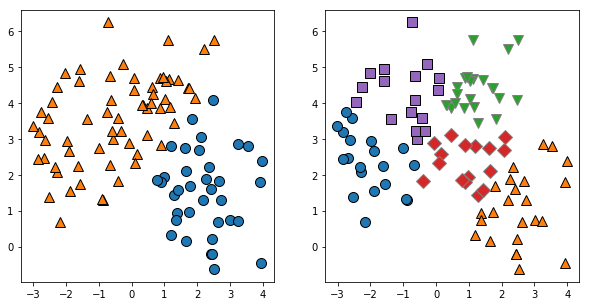

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 选两个中心:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 选五个中心:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0,0.5,'X1')

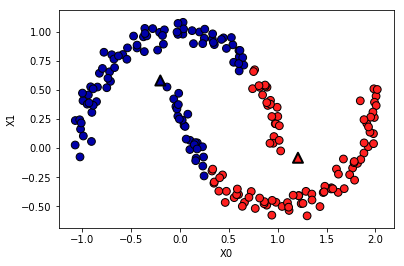

In [25]:
# K均值也有失效的时候
# 月牙状数据
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 分为两类
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 画出聚类和中心点
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("X0")
plt.ylabel("X1")

解决办法: 选择更多的聚类中心, 比如,选十个, 就可以解决这个分类问题. 

注意:
    1. 尽管聚类看起来和监督学习里的分类算法相似, 但这里的标签没有任何真实的(先验)含义.
    2. 例如,用于人脸识别,聚类算法只能识别出哪些人脸是相似的,但无法识别出这个人究竟是谁.
    

### 3.4.2 DBSCAN 
(Density-based spatial clustering of applications with noise)
又一种有用的聚类算法. 基于密度的空间聚类. 特点是: 不需要使用者设置类别的数目.
对相对大的数据集有用.

DBSCAN背后的基本思想: 聚类形成数据的致密区域. 
DBSCAN算法能识别出特征空间中的致密(dense)区域.

核心样本: 特征空间的致密区域的数据点.

参数: 
   
    min_samples和 eps. 如果在距离一个已知数据点的距离<eps范围内, 至少有min_samples个数据点, 那么这个数据点就被归为核心样本.
    核心样本之间的距离若小于eps, 则它们被归为一类.
    
算法: 
    1. 提取任意一个数据点.
    2. 找到所有距离小于eps的点,计数. 如果次数小于min_samples, 则该点归类为噪声(不属于任何一类); 
    2'.如果次数大于min_samples, 则该点归类为一个核心样本(并贴一个新标签).遍历距离该点的距离小于eps的点. 如果有某些点尚未被标记标签,则为之分配新标签. 如果它是核心样本,则继续遍历该样本(数据点)的邻居,等等.
    3. 当没有核心样本在eps范围内时, 聚类停止增长. 
    4. 再提取从未访问过的点.(如1)

In [27]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


None

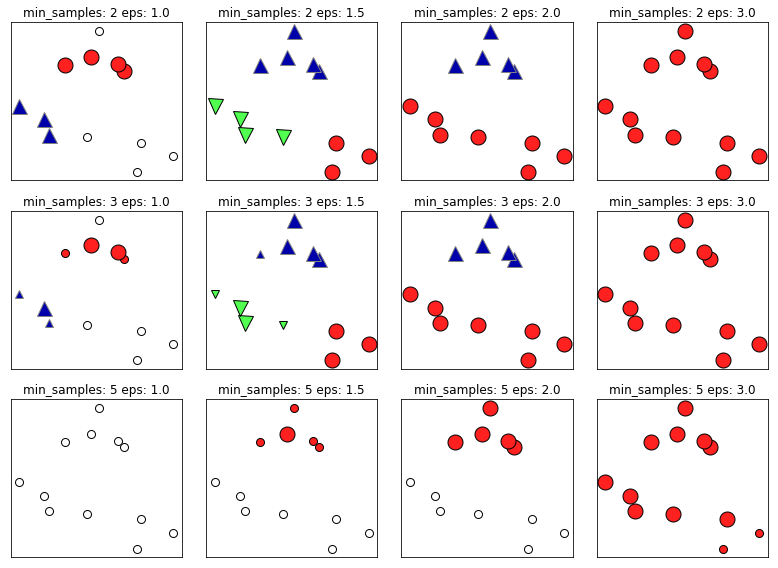

In [26]:
display(mglearn.plots.plot_dbscan())

Text(0,0.5,'X1')

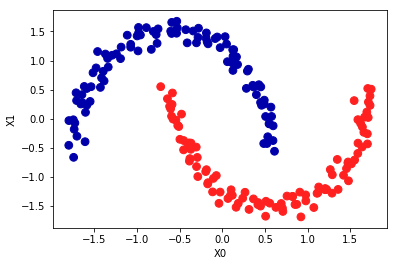

In [28]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 标度修正:平均值为0,方差为1. 修正标度后,eps的值很好设置.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 聚类结果
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("X0")
plt.ylabel("X1")

### 小结:

    1. 正确地表示数据对监督和非监督学习的成功与否非常重要.
    2. 在缺乏标签时, 降维和聚类对于我们进一步理解数据很有帮助.
    2. 建议在sklearn中用二维数据和真实数据集做分析.

# 4. 模型评估

监督学习的一般步骤. 举例如下:

In [29]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 数据集
X, y = make_blobs(random_state=0)
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
# 实例化模型并拟合模型
logreg = LogisticRegression().fit(X_train, y_train)
# 在测试集上做评估
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.84


这种评估,可以从两方面扩展: 

    1. 交叉验证,一种获取普遍性的更好的方法.  
    2. 精确度和拟合优度之外的其他评估标准

## 4.1 交叉验证

一种比分割数据集更加稳定的评估模型普遍适用性的统计方法.
特点: 
反复分割数据集, 训练出多个模型. 

k重交叉验证:
最常用的交叉验证版本. k的值由用户决定,通常取10,5.


D:\programs\Anaconda3\envs\base_cp\lib\site-packages\matplotlib\pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


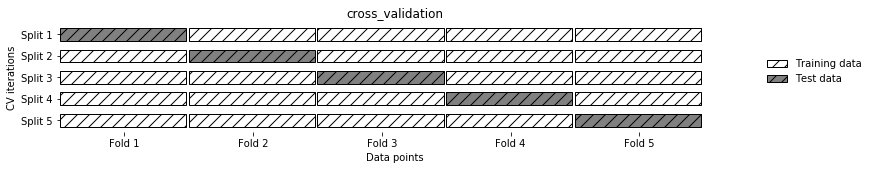

In [29]:
# 五重交叉验证: 数据平均分为5部分(5 folds). 
mglearn.plots.plot_cross_validation()

最后,我们搜集到了5个精确度值.

In [30]:
# 默认时3重交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


In [31]:
# 设置交叉验证的重数为5: cv=5
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average Cross-validation scores: {}".format(scores.mean()))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]
Average Cross-validation scores: 0.9600000000000002


#### Stratified k重交叉验证

D:\programs\Anaconda3\envs\base_cp\lib\site-packages\mglearn\plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
D:\programs\Anaconda3\envs\base_cp\lib\site-packages\mglearn\plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
D:\programs\Anaconda3\envs\base_cp\lib\site-packages\mglearn\plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
D:\programs\Anaconda3\envs\base_cp\lib\site-packages\mglearn\plot_cross_validation.py:163: MatplotlibDeprecationWarning: The 

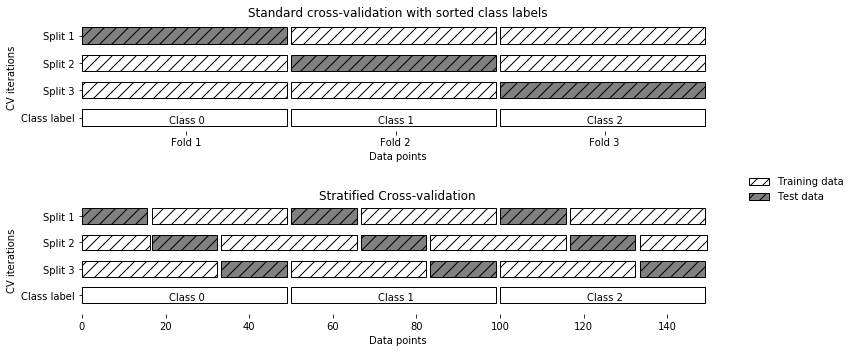

In [32]:
mglearn.plots.plot_stratified_cross_validation()

所以,通常我们最好选stratified k重交叉验证方法.

## 4.2  格点搜索

通过调整参数来提高模型的普适性.

注意:调整参数以前, 请先理解参数的含义.

如何发现参数的最好的值呢? sklearn里有标准的方法---格点搜索.其含义: 尝试你关注的参数的所有组合.

#### 简单格点搜索

In [32]:
# 简单格点搜索
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每个组合,训练SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 估算SVC于测试集
        score = svm.score(X_test, y_test)
        # 若有更好者,保存其得分
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


我们需要将数据集分割为三部分: 训练集,测试集,验证集.
    
验证集用于选出最好的参数, 
然后对于训练集和验证集,训练出模型.

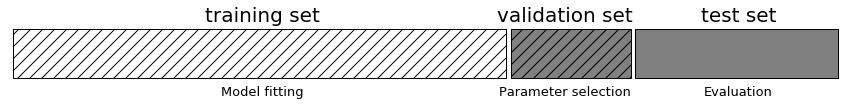

In [34]:
mglearn.plots.plot_threefold_split()

In [33]:
from sklearn.svm import SVC
# 分割数据为三部分: train+validation,  test.
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 分割train+validation集到训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 在训练集+验证集上再次训练模型,
# 在测试集上评估模型
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92
